# PREDICT THE PRICE OF BOOKS.





## SOURCE : MACHINE HACK.


## PROBLEM STATEMENT :
 In this challenge, participants are required to use the dataset to build a Machine Learning model to predict the price of books based on a given set of features. Size of training set: 6237 records Size of test set: 1560 records FEATURES: Title: The title of the book Author: The author(s) of the book. Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018) Reviews: The customer reviews about the book Ratings: The customer ratings of the book Synopsis: The synopsis of the book Genre: The genre the book belongs to BookCategory: The department the book is usually available at. Price: The price of the book (Target variable)

### Importing the librarys..

In [1]:
import numpy as np
import pandas as pd 
from pandas import DataFrame , Series 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn import model_selection
from sklearn.linear_model import LinearRegression


In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import  mean_squared_error, mean_absolute_percentage_error ,mean_absolute_error
from sklearn.model_selection import GridSearchCV


### Importing the data..

In [4]:
train = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Data_Test.xlsx")
                   

In [4]:
train.head(5)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [5]:
test.head(5)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


### Lets combine my train and test data. so not to perform same operations twice (combi = train+test data).

In [5]:
combi = pd.concat([train, test], ignore_index=True)

In [7]:
combi.head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93


In [8]:
combi.tail(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
7795,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts",NaN
7796,Complete Spanish Step-by-Step,Barbara Bregstein,"Paperback,– 16 Sep 2016",4.5 out of 5 stars,2 customer reviews,Learn Spanish with the most convenient and eff...,Dictionaries,"Language, Linguistics & Writing",NaN


In [9]:
combi.shape , train.shape , test.shape

((7797, 9), (6237, 9), (1560, 8))

In [10]:
train.isna().sum() , test.isna().sum()

(Title           0
 Author          0
 Edition         0
 Reviews         0
 Ratings         0
 Synopsis        0
 Genre           0
 BookCategory    0
 Price           0
 dtype: int64,
 Title           0
 Author          0
 Edition         0
 Reviews         0
 Ratings         0
 Synopsis        0
 Genre           0
 BookCategory    0
 dtype: int64)

In [11]:
combi.Author.unique().shape

(4372,)

In [12]:
combi.dtypes

Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object

In [13]:
combi.Edition.unique()

array(['Paperback,– 10 Mar 2016', 'Paperback,– 7 Nov 2012',
       'Paperback,– 25 Feb 1982', ..., 'Hardcover,– 11 Apr 2017',
       'Paperback,– 2 Jul 1999', 'Paperback,– 16 Sep 2016'], dtype=object)

In [14]:
combi.Edition.unique().shape

(3882,)

In [15]:
combi["Ratings"].unique()

array(['8 customer reviews', '14 customer reviews', '6 customer reviews',
       '13 customer reviews', '1 customer review', '72 customer reviews',
       '16 customer reviews', '111 customer reviews',
       '132 customer reviews', '17 customer reviews',
       '4 customer reviews', '3 customer reviews', '5 customer reviews',
       '2 customer reviews', '23 customer reviews', '76 customer reviews',
       '10 customer reviews', '9 customer reviews', '15 customer reviews',
       '34 customer reviews', '32 customer reviews',
       '49 customer reviews', '62 customer reviews',
       '61 customer reviews', '7 customer reviews', '18 customer reviews',
       '98 customer reviews', '12 customer reviews',
       '97 customer reviews', '285 customer reviews',
       '29 customer reviews', '27 customer reviews',
       '267 customer reviews', '24 customer reviews',
       '146 customer reviews', '95 customer reviews',
       '234 customer reviews', '35 customer reviews',
       '66 custome

In [16]:
combi.Ratings.unique().shape

(368,)

In [17]:
combi.Reviews.unique()

array(['4.0 out of 5 stars', '3.9 out of 5 stars', '4.8 out of 5 stars',
       '4.1 out of 5 stars', '5.0 out of 5 stars', '4.5 out of 5 stars',
       '4.4 out of 5 stars', '4.7 out of 5 stars', '4.2 out of 5 stars',
       '4.9 out of 5 stars', '3.5 out of 5 stars', '3.8 out of 5 stars',
       '4.3 out of 5 stars', '3.1 out of 5 stars', '4.6 out of 5 stars',
       '2.0 out of 5 stars', '3.7 out of 5 stars', '3.2 out of 5 stars',
       '2.6 out of 5 stars', '2.8 out of 5 stars', '3.4 out of 5 stars',
       '2.9 out of 5 stars', '3.3 out of 5 stars', '3.0 out of 5 stars',
       '2.5 out of 5 stars', '1.0 out of 5 stars', '3.6 out of 5 stars',
       '2.7 out of 5 stars', '1.5 out of 5 stars', '2.3 out of 5 stars',
       '1.7 out of 5 stars', '2.2 out of 5 stars', '1.4 out of 5 stars',
       '2.4 out of 5 stars', '1.6 out of 5 stars', '2.1 out of 5 stars'],
      dtype=object)

In [18]:
combi.Reviews.unique().shape

(36,)

In [19]:
combi.Synopsis.unique().shape

(6771,)

In [20]:
combi.Genre.unique()

array(['Action & Adventure (Books)', 'Cinema & Broadcast (Books)',
       'International Relations', 'Contemporary Fiction (Books)',
       'Photography Textbooks', 'Healthy Living & Wellness (Books)',
       'Crime, Thriller & Mystery (Books)',
       'Sports Training & Coaching (Books)',
       'Biographies & Autobiographies (Books)', 'Asian History',
       'Banks & Banking', 'Comics & Mangas (Books)',
       "Children's Mysteries & Curiosities (Books)", 'Mangas',
       'Artificial Intelligence',
       'Software & Business Applications (Books)', 'German',
       'International Business', 'Cricket (Books)',
       'Comics & Graphic Novels (Books)', 'PC & Video Games (Books)',
       'Short Stories (Books)', 'Astrology', 'Romance (Books)', 'Design',
       'Introductory & Beginning Programming', 'Travel (Books)',
       'Sports (Books)', 'Communications', 'Foreign Languages',
       'Linguistics (Books)', 'Music Books',
       'Outdoor Survival Skills (Books)', 'True Accounts (Books

In [21]:
combi.Genre.unique().shape

(363,)

In [22]:
combi.Title.unique()

array(["The Prisoner's Gold (The Hunters 3)",
       'Guru Dutt: A Tragedy in Three Acts',
       'Leviathan (Penguin Classics)', ...,
       'The Kite Runner Graphic Novel',
       'Panzer Leader (Penguin World War II Collection)',
       'Complete Spanish Step-by-Step'], dtype=object)

In [23]:
combi.Title.unique().shape

(6787,)

In [24]:
combi.BookCategory.unique()

array(['Action & Adventure', 'Biographies, Diaries & True Accounts',
       'Humour', 'Crime, Thriller & Mystery', 'Arts, Film & Photography',
       'Sports', 'Language, Linguistics & Writing',
       'Computing, Internet & Digital Media', 'Romance',
       'Comics & Mangas', 'Politics'], dtype=object)

In [25]:
combi.BookCategory.unique().shape

(11,)

combi.Price.plot(kind="density")

In [26]:
combi.Price.skew()

6.74986557371863

combi.Price.plot(kind="box")

In [27]:
combi.Price.mean(),combi.Price.median(),combi.Price.mode() 

(560.7075164341832,
 373.0,
 0    299.0
 dtype: float64)

In [28]:
combi.Price.max() , combi.Price.min()

(14100.0, 25.0)

In [29]:
combi.Price.describe()

count     6237.000000
mean       560.707516
std        690.110657
min         25.000000
25%        249.180000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64

## Inference :

1. The train , Test data  shape are (6237, 9), (1560, 8).
2. There are no null values in Train & Test data..
3. There are no outliers as of now in the data 
4. Max price of a book is 14000, which is possible.
5. There were no duplicates rows.
6. The title feature has 6787 unique rows.
7. The Synopsis feature will always be unique for every book title. So the feature becomes noisy for model.
8. The Edition feature has unique values. there may be some useful information on it
9. The Genre feature has 363 unique values.. If we try to bi bin it it will look like Book_Category feature which is already there and has 11 unique values.
10. The Author feature has 4732 unique values. so may be considered as noise but checking patterns by graphs.
11. The Review 36 feature has unique values.. but have to split number from string as it has to behave as a number.
12. The Ratings 368 feature has unique values.. but have to split number from string as all the ratings are out of 5 and it has to behave as a numerical feature.



### As in Edition column we can see that two features can be extracted like paperback, hardcover , etc .. and the second feature that is year of that book published..
### We will take the booktype(paperback, hardcover , etc) by adding a new copytype column..
### As there was too much irrelevent information and integral features were being considered as categorical.. so removing noise from Edition, Ratings,Genre, and Reviews

In [6]:
combi['copytype']=combi['Edition'].apply(lambda x: x.split(',– ')[0])


In [7]:
combi['Reviews'] = combi.Reviews.apply(lambda r: float(r.split()[0]))
combi['Ratings']= combi.Ratings.str.extract('(\d+)')
combi["Genre"] =  combi.Genre.apply(lambda x: x.strip('(books)').strip('Textbooks'))
combi['Edition'] = combi.Edition.apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')
combi.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,copytype
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,2016,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (B,Action & Adventure,220.00,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,2012,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (B,"Biographies, Diaries & True Accounts",202.93,Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,1982,4.8,6,"""During the time men live without a common Pow...",International Relation,Humour,299.00,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,2017,4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (B,"Crime, Thriller & Mystery",180.00,Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,2006,5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography,"Arts, Film & Photography",965.62,Hardcover


In [32]:
combi.Edition.sort_values().unique()

array(['1900', '1905', '1925', '1942', '1960', '1961', '1964', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', 'na'], dtype=object)

In [33]:
combi.Ratings.unique().shape

(345,)

In [34]:
combi.Reviews.sort_values().unique()

array([1. , 1.4, 1.5, 1.6, 1.7, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [35]:
combi.Genre.unique().shape

(363,)

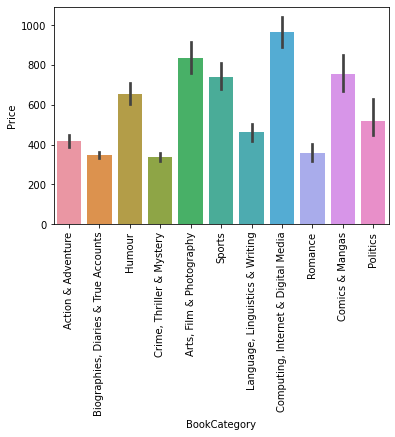

In [36]:
sns.barplot(data=train,x=combi['BookCategory'],y=combi['Price'])
plt.xticks(rotation=90)
plt.show()

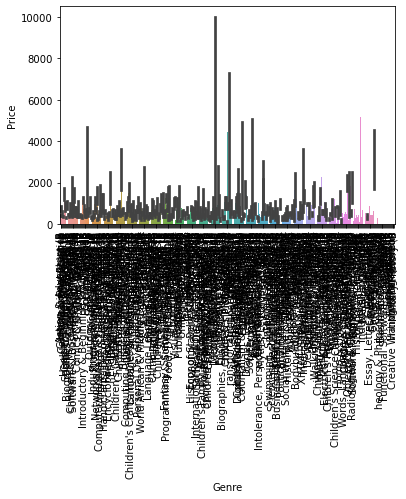

In [37]:
sns.barplot(data=train,x=combi['Genre'],y=combi['Price'])
plt.xticks(rotation=90)
plt.show()

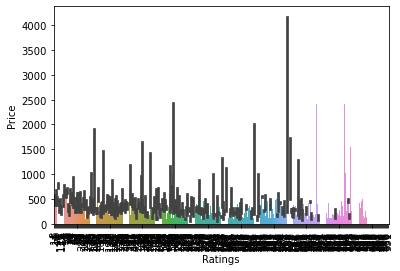

In [38]:
sns.barplot(data=train,x=combi['Ratings'],y=combi['Price'])
plt.xticks(rotation=90)
plt.show()

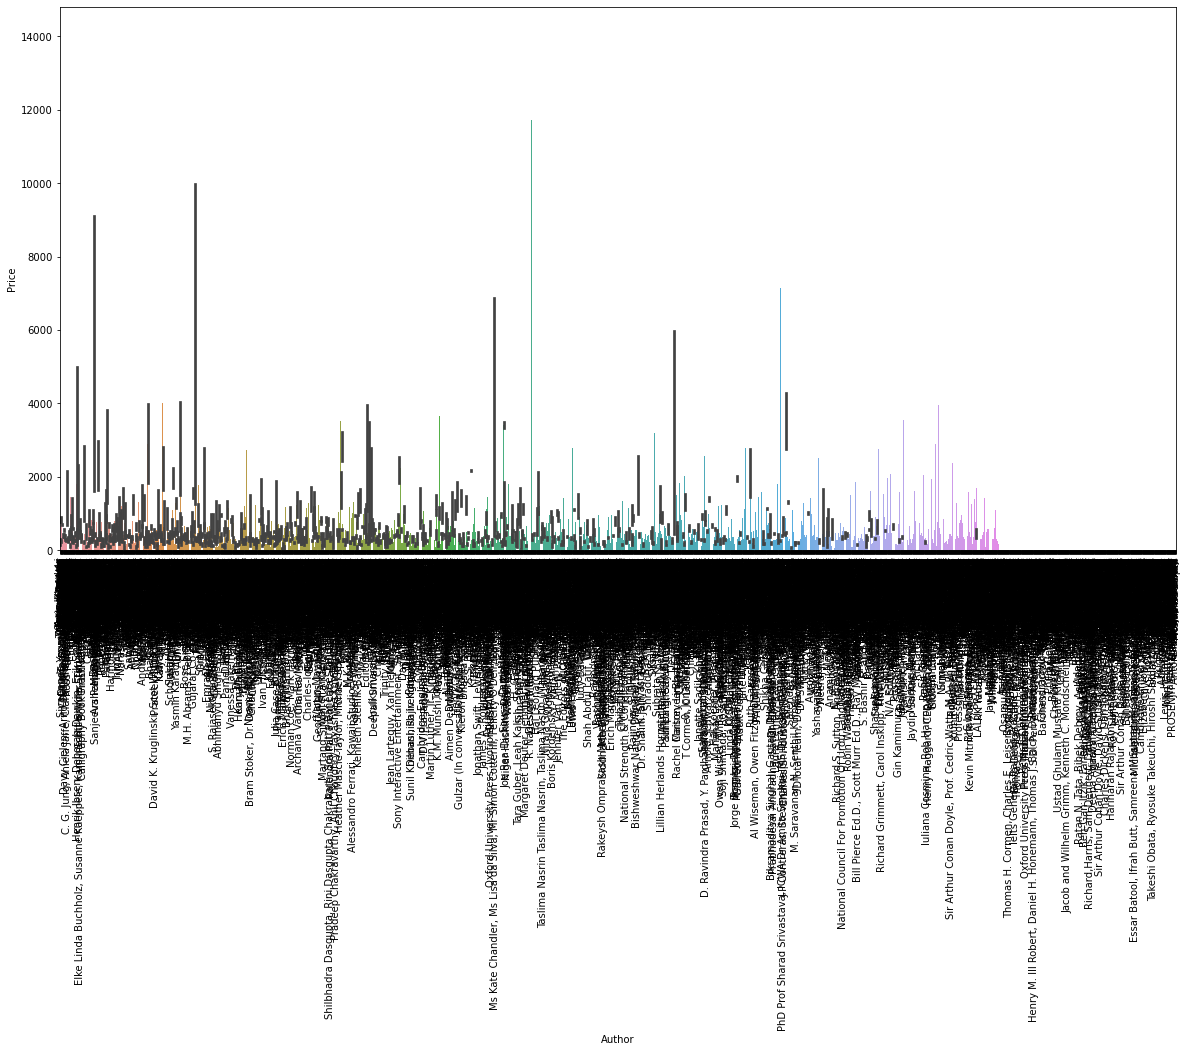

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(data=train,x=combi['Author'],y=combi['Price'])
plt.xticks(rotation=90)
plt.show()

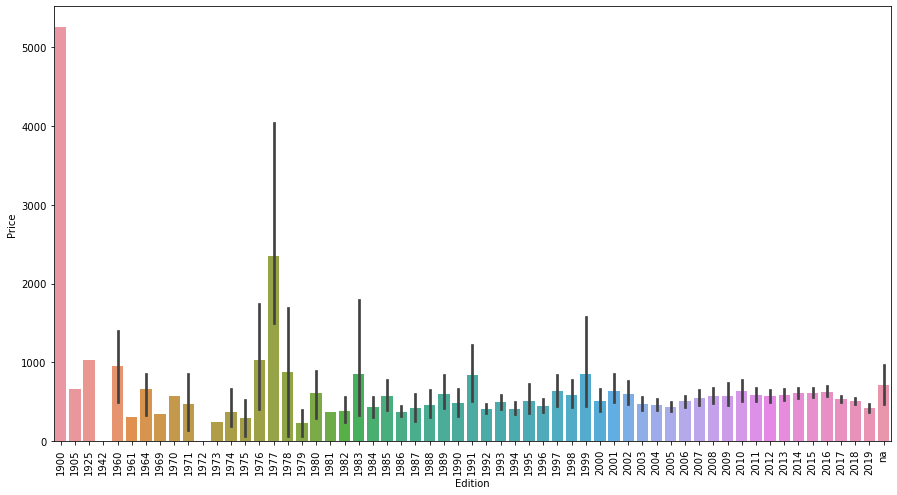

In [40]:
plt.figure(figsize=(15,8))
sns.barplot(data=train,x=combi['Edition'].sort_values(),y=combi['Price'])
plt.xticks(rotation=90)
plt.show()

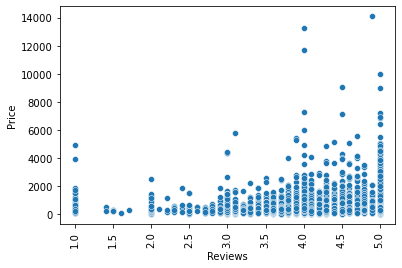

In [41]:
sns.scatterplot(x=combi['Reviews'],y=combi['Price'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

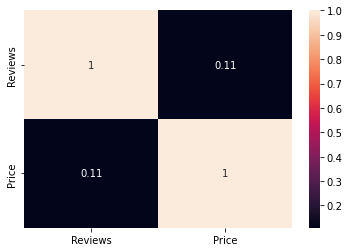

In [42]:
sns.heatmap(combi.corr() , annot=True)

In [43]:
## Inference :


###  Dropping the "Title" , "Synopsis", "Genre","Author" columns as there were no relevance or any patterns and the value counts were very high to considerd in categorical column....

In [8]:
combi = combi.drop(["Title" , "Synopsis", "Genre","Author"] , axis=1)

In [45]:
combi.dtypes

Edition          object
Reviews         float64
Ratings          object
BookCategory     object
Price           float64
copytype         object
dtype: object

In [46]:
combi.head(5)

,Edition,Reviews,Ratings,BookCategory,Price,copytype
0,2016,4.0,8,Action & Adventure,220.00,Paperback
1,2012,3.9,14,"Biographies, Diaries & True Accounts",202.93,Paperback
2,1982,4.8,6,Humour,299.00,Paperback
3,2017,4.1,13,"Crime, Thriller & Mystery",180.00,Paperback
4,2006,5.0,1,"Arts, Film & Photography",965.62,Hardcover


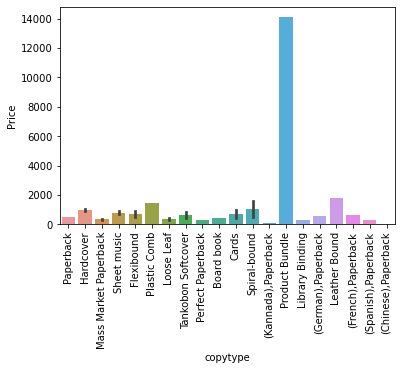

In [47]:
sns.barplot(x=combi["copytype"], y=combi["Price"] )
plt.xticks(rotation = 90)
plt.show()

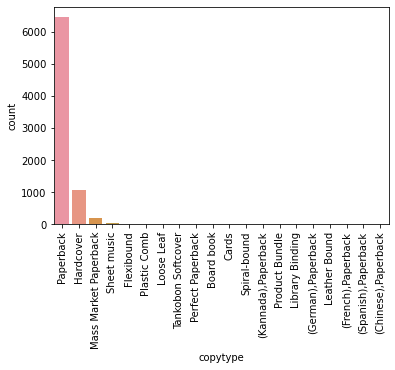

In [48]:
sns.countplot(x=combi["copytype"])
plt.xticks(rotation = 90)
plt.show()

In [9]:
combi[combi["copytype"]=="Product Bundle"]

,Edition,Reviews,Ratings,BookCategory,Price,copytype
2455,2016,4.9,22,Comics & Mangas,14100.0,Product Bundle


### This Product Bundle category has extereme high value and the value-count of product bundle is 1.. so if we drop this row not only our outlier price is getting removed , as well as bundled book category which is not present in our data.. 

In [10]:
combi = combi.drop(2455)                         # droping row with copytype "Prodect Bundle", Treating it as outlier.

In [11]:
combi[combi["copytype"]=="Product Bundle"]       # checking if removed

,Edition,Reviews,Ratings,BookCategory,Price,copytype


### Now, as seen there are too may redundant category in copy type.. so lets bin them into proper category's.. 
### Edtion column will dropped because some of rows are missing year and there is no difinitive pattern and for treating as category,value counts are high.

In [12]:
combi['copytype'] = combi['copytype'].replace(['Mass Market Paperback','Perfect Paperback', '(Kannada),Paperback',
                                              '(German),Paperback','(French),Paperback', '(Spanish),Paperback',
                                               '(Chinese),Paperback'] ,'Paperback',method='str')

combi['copytype'] = combi['copytype'].replace(['Tankobon Softcover', 
                                               'Loose Leaf', 
                                               'Board book','Flexibound', 
                                               'Leather Bound','Sheet music',
                                               'Product Bundle', 'Library Binding', 
                                              'Plastic Comb','Cards','Spiral-bound'
                                              ] ,'others',method='str')

In [53]:
combi['copytype'].unique()

array(['Paperback', 'Hardcover', 'others'], dtype=object)

In [13]:
combi.drop("Edition" , axis=1 , inplace=True)

### The features left with us after the Data Cleaning and Data Wrangling.. now lets convert data types accordingly if wanted & Encoding our categorical features.. 

### dummy encode cat : bookcategory , copytype.
### numerical columns: Price , Reviews, Ratings.

In [55]:
combi.dtypes

Reviews         float64
Ratings          object
BookCategory     object
Price           float64
copytype         object
dtype: object

In [14]:
combi["Ratings"] = combi["Ratings"].astype("float")


In [15]:
combi= pd.get_dummies(combi , drop_first=True)

In [58]:
combi.head(2)

,Reviews,Ratings,Price,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,copytype_Paperback,copytype_others
0,4.0,8.0,220.00,0,0,0,0,0,0,0,0,0,0,1,0
1,3.9,14.0,202.93,0,1,0,0,0,0,0,0,0,0,1,0


## Splitting our Train and Test data in the shape it was earlier.. 

In [16]:
newtrain = combi.loc[0:train.shape[0]-1] 
newtest =  combi.loc[train.shape[0]:, ]              # Data is splitted in shape as it was earlier.

In [17]:
newtest.drop("Price" , axis=1 , inplace=True)

In [61]:
newtrain.shape,newtest.shape,train.shape,test.shape  # tells us that the rows are splitted as they were before combining them.

((6236, 15), (1560, 14), (6237, 9), (1560, 8))

## Finding variance_inflation_factor to check for Multi-collinearity..

In [18]:
vif = pd.DataFrame() 
vif['VIF_Factor'] = [variance_inflation_factor(newtrain.values,i) for i in range(newtrain.shape[1])] 
vif['Features'] = newtrain.columns 
vif.sort_values('VIF_Factor', ascending=False).reset_index(drop=True)

,VIF_Factor,Features
0,12.458441,Reviews
1,7.034387,copytype_Paperback
2,1.994306,Price
3,1.746923,"BookCategory_Crime, Thriller & Mystery"
4,1.681307,BookCategory_Comics & Mangas
5,1.658688,"BookCategory_Biographies, Diaries & True Accounts"
6,1.622276,"BookCategory_Arts, Film & Photography"
7,1.612681,"BookCategory_Computing, Internet & Digital Media"
8,1.605598,"BookCategory_Language, Linguistics & Writing"
9,1.600604,BookCategory_Romance


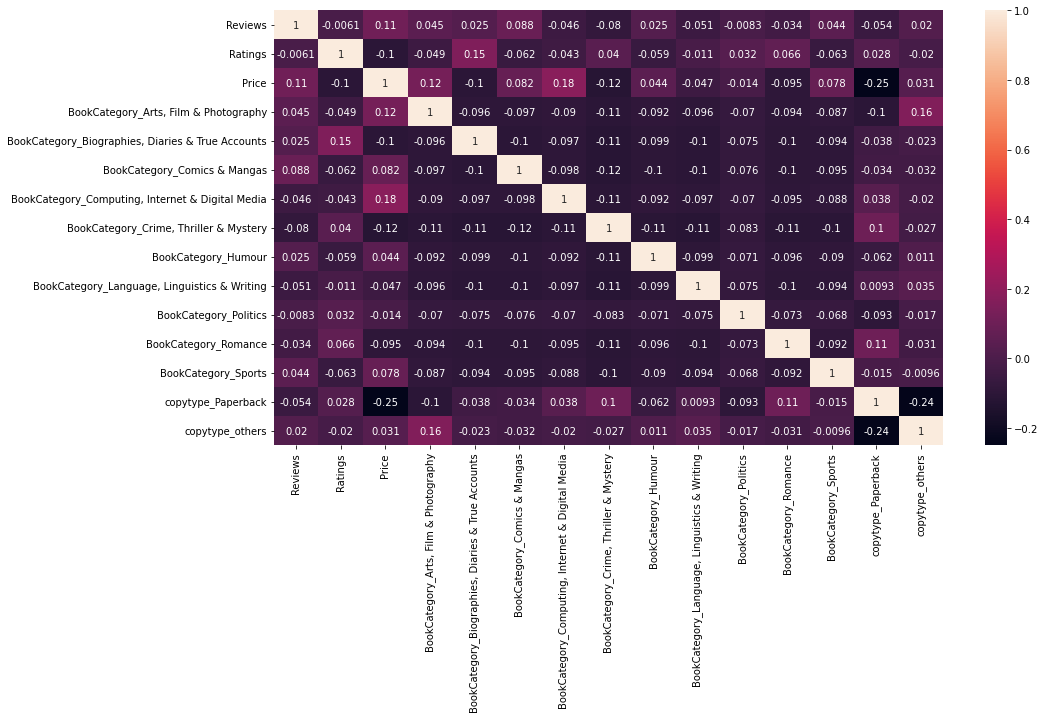

In [85]:
plt.figure(figsize=(15,8))
sns.heatmap(combi.corr() , annot=True)
plt.show()

### Inference :

1. The data combined before was splitted and saved in newtrain & newtest variables.
2. As VIF_score is less for every features, so there is no multi-collinearity present in the data.
3. The Copytype feature has a definitive pattern with price,and the value counts suggested bining them to make it more precise
4. The features ["Title" , "Synopsis", "Genre","Author"] were dropped.




### Making stats model (OLS) to check feature importance and their pvalues, coefficients on **Train data** to validate my model..

In [19]:

x1 = newtrain.drop("Price" , axis =1 ) 
y1= newtrain["Price"] 
x2= sm.add_constant(x1)
rf = sm.OLS(y1 ,x2).fit() 
rf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     82.90
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          1.64e-218
Time:                        17:07:53   Log-Likelihood:                -48880.
No. Observations:                6236   AIC:                         9.779e+04
Df Residuals:                    6221   BIC:                         9.789e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                               481.1364     59.988      8.021      0.000     363.539     598.734
Reviews                                              81.1501     11.889      6.826      0.000      57.843     104.457
Ratings                                              -0.4125      0.095     -4.360      0.000      -0.598      -0.227
BookCategory_Arts, Film & Photography               355.1092     34.925     10.168      0.000     286.643     423.575
BookCategory_Biographies, Diaries & True Accounts   -86.9576     33.384     -2.605      0.009    -152.402     -21.513
BookCategory_Comics & Mangas                        257.2948     33.461      7.689      0.000     191.700     322.890
BookCategory_Computing, Internet & Digital Media    554.2558     34.696     15.975      0.000     486.239     622.272
BookCategory_Crime, Thriller & Mystery              -35.2161     31.463     -1.119      0.263     -96.895      26.462
BookCategory_Humour                                 182.8747     34.189      5.349      0.000     115.853     249.897
BookCategory_Language, Linguistics & Writing         51.1678     33.193      1.542      0.123     -13.901     116.237
BookCategory_Politics                                42.6737     40.475      1.054      0.292     -36.672     122.019
BookCategory_Romance                                 -8.8804     33.802     -0.263      0.793     -75.144      57.383
BookCategory_Sports                                 285.4349     35.619      8.014      0.000     215.609     355.261
copytype_Paperback                                 -449.5066     23.477    -19.147      0.000    -495.529    -403.484
copytype_others                                    -302.2689     83.048     -3.640      0.000    -465.071    -139.467
==============================================================================
Omnibus:                     7639.764   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1632901.861
Skew:                           6.435   Prob(JB):                         0.00
Kurtosis:                      81.223   Cond. No.                         961.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference :

1. The R_squared value is 0.157 ,which suggest that model in not performing well.
2. The Adj_Rsquared value is 0.155.
3. There is too much skewness in price feature (6.25)
4. Durbin_watson score is good but model is underfit.
5. As condition number is near 1000, there is some multi-collinearity present.
6. Only handful of features had p_value > 0.05.
7. **UNDERFIT MODEL**



### Since the R_Square is very low and the skewness is very high.. let's tranform the data using PowerTransformer..

In [20]:
power = PowerTransformer()
train1= power.fit_transform(newtrain)    

In [65]:
newtrain.columns

Index(['Reviews', 'Ratings', 'Price', 'BookCategory_Arts, Film & Photography',
       'BookCategory_Biographies, Diaries & True Accounts',
       'BookCategory_Comics & Mangas',
       'BookCategory_Computing, Internet & Digital Media',
       'BookCategory_Crime, Thriller & Mystery', 'BookCategory_Humour',
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Politics',
       'BookCategory_Romance', 'BookCategory_Sports', 'copytype_Paperback',
       'copytype_others'],
      dtype='object')

In [21]:
train1 = DataFrame(train1 , columns =['Reviews', 'Ratings', 'Price', 'BookCategory_Arts, Film & Photography',
       'BookCategory_Biographies, Diaries & True Accounts',
       'BookCategory_Comics & Mangas',
       'BookCategory_Computing, Internet & Digital Media',
       'BookCategory_Crime, Thriller & Mystery', 'BookCategory_Humour',
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Politics',
       'BookCategory_Romance', 'BookCategory_Sports', 'copytype_Paperback',
       'copytype_others'])

### Removing high P_value features and storing in variable (xp) on **Train data** to validate my model..

In [32]:
xp = train1.drop(["Price","copytype_others","BookCategory_Biographies, Diaries & True Accounts",
                  "BookCategory_Crime, Thriller & Mystery" ,"BookCategory_Language, Linguistics & Writing",
                 "BookCategory_Politics","BookCategory_Romance"] , axis =1 ) 
yp = train1["Price"]
xps= sm.add_constant(xp)
xtrain ,xtest, ytrain , ytest = train_test_split(xps,yp,test_size=.3 , random_state= 1)
rf = sm.OLS(yp ,xps).fit() 
rf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     257.5
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:17:53   Log-Likelihood:                -7957.3
No. Observations:                6236   AIC:                         1.593e+04
Df Residuals:                    6227   BIC:                         1.599e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             4.111e-16      0.011   3.74e-14      1.000      -0.022       0.022
Reviews                                              0.1258      0.011     11.082      0.000       0.104       0.148
Ratings                                             -0.1701      0.012    -14.770      0.000      -0.193      -0.148
BookCategory_Arts, Film & Photography                0.1749      0.011     15.341      0.000       0.153       0.197
BookCategory_Comics & Mangas                         0.1400      0.011     12.244      0.000       0.118       0.162
BookCategory_Computing, Internet & Digital Media     0.2580      0.011     22.849      0.000       0.236       0.280
BookCategory_Humour                                  0.1199      0.011     10.482      0.000       0.097       0.142
BookCategory_Sports                                  0.1573      0.011     13.787      0.000       0.135       0.180
copytype_Paperback                                  -0.2045      0.011    -18.397      0.000      -0.226      -0.183
==============================================================================
Omnibus:                      377.967   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              887.940
Skew:                          -0.376   Prob(JB):                    1.54e-193
Kurtosis:                       4.689   Cond. No.                         1.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Random Forest Regressor with selected features as in O.L.S model on **Train data** to validate my model..

In [33]:

xtrain ,xtest, ytrain , ytest = train_test_split(xp,yp,test_size=.3 , random_state= 1)


In [34]:
rf = RandomForestRegressor()
model_1 = rf.fit(xtrain,ytrain)
pred = rf.predict(xtest)

print(rf.score(xtest ,ytest))

0.16714190103012438


In [35]:
mse = mean_squared_error(ytest, pred)
rmse = mse**.5
print(mse)
print(rmse)

0.8211351610018894
0.9061650848503762


<AxesSubplot:xlabel='Price'>

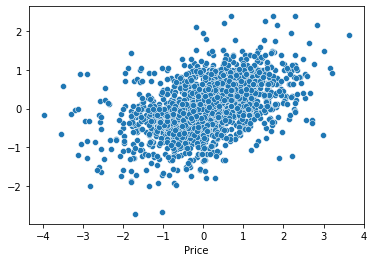

In [36]:
sns.scatterplot(ytest , pred)

In [37]:
a=ytest
b=pred
print(np.corrcoef(a,b))

[[1.         0.45585835]
 [0.45585835 1.        ]]


### Decision Tree Regressor with selected features as in O.L.S model on **Train data** to validate my model..

In [38]:
dt = DecisionTreeRegressor()
model_1 = dt.fit(xtrain,ytrain)
pred2 = dt.predict(xtest)

print(dt.score(xtest , ytest))

-0.05725763417758367


In [39]:
mse = mean_squared_error(ytest, pred2)
rmse = mse**.5
print(mse)
print(rmse)

1.0423761487517071
1.0209682408144276


### Gradient Boosting Regressor with selected features as in O.L.S model on **Train data** to validate my model..

In [40]:
xg = GradientBoostingRegressor()
model_1 = xg.fit(xtrain,ytrain)
pred1 = xg.predict(xtest)

print(rf.score(xtest ,ytest))

0.16714190103012438


In [41]:
mse = mean_squared_error(ytest, pred1)
rmse = mse**.5
print(mse)
print(rmse)

0.7265921020442325
0.8524037201022955


## Inference :

1. In O.L.S, The R_squared ,Adj_Rsquared value is 1 ,which suggest that model is performing well.
       a. There is no skewness in features,Durbin_watson score is good , NO features has p_value > 0.05.
       b. As condition number is near 1000, there is no multi-collinearity present.
2. In **Decision Tree** , the Rsquare was close to 1 and the **RMSE= 0.00616**   
5. In **RANDOM FOREST** , the Rsquare was close to 1 and the **RMSE= 0.00390**
6. In **GRADIENT BOOSTING** , the Rsquare was close to 1 and the **RMSE= 0.00999**
7. The **correlation coeficient** between ytest and pred (train1 data) is **[1 , 0.99999229]
8. Plotting scatterplot of ytest and pred gives us every data point on a sigular line  

**BEST FIT MODEL**


### HYPER-PARAMETER TUNING:

    ### As features were tuned using stats model, we may not have to use GridSearchCV for hyperparametrs

## Based on my RMSE on train data, RANDOM FOREST REGRESSOR on whole data..

### After feature selection which was used earlier on train data 

In [82]:
x1=newtrain.drop("Price" , axis=1)
y1=newtrain["Price"]

In [ ]:
rf = RandomForestRegressor()

model = rf.fit(x1,y1)
pred = rf.predict(newtest)

solution = pd.DataFrame({"price": pred})
solution.to_csv("RF_MODEL.csv", index = False)

###  GRADIENT BOOSTING REGRESSOR with KFold on whole data..

In [ ]:
n = 10

from sklearn.model_selection import KFold

k = KFold(n_splits=10, shuffle=True)


gbm = GradientBoostingRegressor()

pred = pd.DataFrame()

for i in range(n):
    folds = next(k.split(X))
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    pred[i] = gbm.fit(xtrain, ytrain).predict(newtest)
    
    
    
solution = pd.DataFrame({"Price": pred.mean(axis = 1)})

solution.to_csv("GBM_Model.csv", index = False)    

### Saved my predicted price of Test data, by training Train data, saving them in solutions...

.

                                                                               Scripted By : Yadvendra Singh Sengar